<a href="https://www.kaggle.com/code/ebrukrkkay/deep-learning-practice?scriptVersionId=104187368" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


(-0.5, 63.5, 63.5, -0.5)

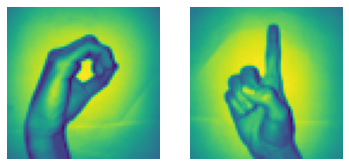

In [2]:
x_1= np.load('../input/sign-language-digits-dataset/X.npy')
Y_1= np.load('../input/sign-language-digits-dataset/Y.npy')
img_size=64
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

In [3]:
X= np.concatenate((x_1[204:409], x_1[822:1027]), axis=0)
z= np.zeros(205)
o= np.ones(205)
Y= np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* X shape burada 410 tane görselin 64x64 pixel büyüklüğünde olduğunu belirtiyor
* 205 tane 0, 205 tane 1'in olduğu resim var demektir.
* Y shape 410,1 ise 410 tane class'ın sample'ları olduğunu belirtiyor.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.15, random_state=42)
number_of_train= X_train.shape[0]
number_of_test= X_test.shape[0]

In [5]:
X_train_flatten= X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten= X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])
print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)
# datayı 3 boyuttan 2 boyuta çevirdik

X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train= X_train_flatten.T
x_test= X_test_flatten.T
y_train= Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
# burada transpoz alarak iki matrisin de genişliklerini eşitliyoruz.
# resimler tek boyutlu bir vektör haline gelmiş  oluyor.

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


* her bir görsel  64x64=4096 pixele sahip
* toplamda 410 görsel bulunmakta, bu görseller 348 train 62 test olarak ayrılmıştır.
* Transpozunu aldığımızdan dolayı artık her görsel bir sütunu temsil etmektedir.
* Bu görseller x train matrisinin içerisinde satırlarda pixeller olacak şekilde bulunmaktadır.
* y train ise etiketleri içerisinde bulundurmaktadır.
* y_train tek satırdan oluşur ve data setimiz işaret dili ile 0-1'lerden oluştuğundan dolayı içerisinde 0-1'leri barındırır. 
* trainde toplamda 348 tane görsel bulunduğundan dolayı y_train'de 348 sütun bulunmaktadır. 

## Computation Graph
* c= sqrt(a^2+b^2)

### Initializing parameters

In [7]:
def dummy(parameter):
    dummy_parameter = parameter+5
    return dummy_parameter
result= dummy(3)

# dimension = bir resmin boyutu o da 4096 pixel
def initialize_weights_and_bias(dimension):
    w= np.full((dimension,1),0.01)
    b= 0.0
    return w,b

# full metodu numpy kütüphanesinin bir metodudur ve içindeki parametreler kadar matris oluşturur.
# dimension =4096 olduğundan 4096,1 'lik bir matris oluşturur ve bu metrisin içerisine belirlediğimiz 0.01 sayısını koyar
# bias'ı 0.0 olarak initialize ettik

In [8]:
w,b= initialize_weights_and_bias(4096)

In [9]:
b

0.0

In [10]:
w.shape

(4096, 1)

### Forward Propagation

In [11]:
# calculation of z
# z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [12]:
y_head=sigmoid(0)
y_head

0.5

In [13]:
# forward propagation steps:
# find z=w.T*x+b
# y_head= sigmod(z) 
# loss(error)= loss(y,y_head)
# cost= sum(loss)

def forward_propagation(w,b,x_train,y_train):
    z=np.dot(w.T,x_train)+b     # weight * x_train + bias
    y_head=sigmoid(z)           # probabilistik değer
    loss= -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    # cost hata maliyetidir.
    return cost

### Forward and Backward Propagation

In [14]:
def forward_backward_propagation(w,b,x_train,y_train):
    z= np.dot(w.T,x_train)+b
    y_head= sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost= (np.sum(loss))/x_train.shape[1]
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias= np.sum(y_head-y_train)/x_train.shape[1]
    # türev formülleri yazıldı
    gradients={"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [15]:
# updating (learning) parameters
def update(w,b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    for i in range(number_of_iteration):
        cost,gradients= forward_backward_propagation(w,b,x_train,y_train)  # forward backward propagation'u çağırıyoruz.
        cost_list.append(cost)
        w= w - learning_rate * gradients["derivative_weight"]  # weight güncellendi , gradient[derivative_weight] = weight'in türevi
        b= b - learning_rate * gradients["derivative_bias"]     # bias güncellendi
        if i%10==0:
            cost_list2.append(cost)    #cost_list2'ye cost'u depoluyoruz ama bu depolamayı her 10 adımda bir yapıyoruz.
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost)) # cost'ları print ediyoruz.
    parameters={"weight":w, "bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [16]:
# prediction
def predict(w,b,x_test):
    z= sigmoid(np.dot(w.T,x_test)+b)  # x_test weight ile çarpılıyor, bias ile toplanıyor sigmoid fonksiyonuna giriyor.
    Y_prediction= np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):      # prediction array oluşturuyoruz çünkü bunu oluşturmazsak model çok yapavaş çalışır
        if z[0,i]<= 0.5:             # z yi dolaş ve z'nin andaki index değeri 0.5'ten küçükse görseli 0 tahmin et
            Y_prediction[0,i]=0
        else:                        # 0.5'ten büyükse 1 görseli olarak tahmin et
            Y_prediction[0,i]=1
    return Y_prediction

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168
Cost after iteration 150: 0.190936


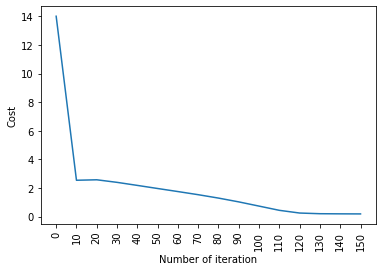

train accuracy: 93.10344827586206 %
test accuracy: 93.54838709677419 %


In [17]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension= x_train.shape[0]
    w,b= initialize_weights_and_bias(dimension)  # weight ve bias initialize edildi
    parameters, gradients, cost_list= update(w,b,x_train,y_train,learning_rate,num_iterations)
    # update metodu ile parametreler gradients ve cost_list update ediliyor
    # parametreler içerisinde weight ve bias bulunmaktadır.
    
    y_prediction_test= predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train= predict(parameters["weight"],parameters["bias"],x_train)
    # ilk olarak test kısmını predict ediyoruz daha sonra ise train kısmı predict ediliyor.
    # train kısmını predict etmemizin nedeni eğittiğimiz datada test etmemiz.
    
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train- y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    # accuracy: tüm datalar arasından yüzde kaçını doğru tahmin ettiğimizdir.
     
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=160 )
# logistic regression fonksiyonunu çağırıyoruz ve modelimize ulaşıyoruz.

test aşamasında modelin aşırı öğrenme veya yetersiz öğrenme yapıp yapmadığını train'i de hesaplatarak kontrol ediyoruz.

### Logistic Regression with Sklearn

In [18]:
from sklearn import linear_model
logreg= linear_model.LogisticRegression(random_state=42, max_iter=150)
print("test accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_test.T,y_test.T)))
print("train accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871
train accuracy: 1.0


## 2-Layer Neural Network

In [19]:
# size of layers and initialize  parameters
# bu sefer parametreleri random tanımlayacağız.
# weightlerin küçük sayı olması gerekiyor çünkü weightler çok yüksek seçilirse tanh 1'e yaklaşacak 1'e yakın bir eğrinin türevi 0'a çok yakın olacağından güncelleme süresi çok uzayacaktır
# hidden layer'ımızın içerisinde 3 tane node olacak şekilde parametre yaratıyoruz
def initialize_parameters_and_layer_sizes_NN(x_train,y_train):
    parameters={"weight1": np.random.randn(3,x_train.shape[0])*0.1, "bias1": np.zeros((3,1)), "weight2": np.random.randn(y_train.shape[0],3)*0.1, "bias2": np.zeros((y_train.shape[0],1))}
    return parameters 

In [20]:
# forward propagation
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train)+ parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]  # hidden layer'dayız şu an 
    A2 = sigmoid(Z2)
    
    cache= {"Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2}
    
    return A2, cache

In [21]:
# loss function and cost function

def compute_cost_NN(A2, Y, parameters):
    logprobs= np.multiply(np.log(A2),Y)
    cost= -np.sum(logprobs)/Y.shape[1]
    return cost

In [22]:
# backward propagation

def backward_propagation_NN(parameters, cache, X, Y):
    dZ2= cache["A2"]-Y    # cost'un z2'ye göre olan türevi
    dW2= np.dot(dZ2, cache["A1"].T)/X.shape[1]
    db2= np.sum(dZ2, axis=1, keepdims=True)/X.shape[1]
    dZ1= np.dot(parameters["weight2"].T,dZ2)*(1- np.power(cache["A1"],2))
    dW1= np.dot(dZ1, X.T)/X.shape[1]    
    db1= np.sum(dZ1, axis=1, keepdims=True)/X.shape[1]
    grads= {"dweight1": dW1, "dbias1": db1, "dweight2": dW2, "dbias2":db2}
    return grads

In [23]:
# update parameters

def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

# dweight cost'un weight'e göre değişimidir.
# learning rate * cost'un weight'e göre türevi parametrelerden çıkarılıyor.
# aynı işler diğer parametreler için de uygulanmaktadır.

In [24]:
# prediction

def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.318558
Cost after iteration 100: 0.334912
Cost after iteration 200: 0.341094
Cost after iteration 300: 0.343392
Cost after iteration 400: 0.344243
Cost after iteration 500: 0.344560
Cost after iteration 600: 0.344679
Cost after iteration 700: 0.344725
Cost after iteration 800: 0.344744
Cost after iteration 900: 0.344752
Cost after iteration 1000: 0.344757
Cost after iteration 1100: 0.344760
Cost after iteration 1200: 0.344761
Cost after iteration 1300: 0.344763
Cost after iteration 1400: 0.344764
Cost after iteration 1500: 0.344765
Cost after iteration 1600: 0.344766
Cost after iteration 1700: 0.344767
Cost after iteration 1800: 0.344768
Cost after iteration 1900: 0.344768
Cost after iteration 2000: 0.344769
Cost after iteration 2100: 0.344769
Cost after iteration 2200: 0.344770
Cost after iteration 2300: 0.344770
Cost after iteration 2400: 0.344771


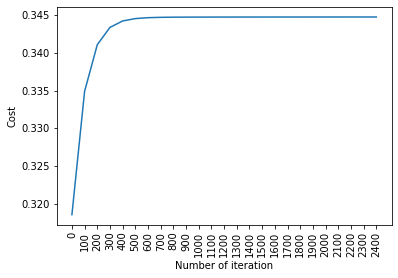

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %


In [25]:
# create model

def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations):
    cost_list=[]
    index_list=[]
    parameters= initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0,num_iterations):
        A2, cache= forward_propagation_NN(x_train, parameters)
        cost= compute_cost_NN(A2,y_train,parameters)
        grads= backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters= update_parameters_NN(parameters, grads)
        
        if i %100 ==0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f"%(i,cost))
            
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
        
    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)

    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    return parameters
    
parameters= two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations= 2500)

In [26]:
# reshaping
x_train, x_test, y_train, y_test= x_train.T, x_test.T, y_train.T, y_test.T

## Implementing with keras library

In [27]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier= Sequential() #initialize neural network
    classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim= x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))           # bu üç satır hidden layer'lar
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
    # adam learning rate'in değişen halidir.
classifier= KerasClassifier(build_fn= build_classifier, epochs= 100)
accuracies= cross_val_score(estimator= classifier, X= x_train, y= y_train, cv=3)
mean= accuracies.mean()
variance= accuracies.std()
print("Accuracy mean:"+str(mean))
print("Accuracy variance:"+str(variance))

2022-08-25 14:32:40.529403: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-25 14:32:40.710678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5043
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5431
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5431
Epoch 11/100
8/8 [===========